## Name: Key
### ISMT S-136 Time Series Analysis with Python   
### Extra Credit Assignemnt

## Problem 1 (3 points)
In this problem we will analyze residuals of an ARMA fit to a stationary stochastic process and see how residual analysis can be used to improve the model. Please perform in steps:  

(a) First, set seed as np.random.seed(1678) and then generate $n=800$ observations $x_1,x_2,\ldots,x_n$ of an AR(3) with $\sigma_w=1$, $\phi_1 = 0.9$, $\phi_2=-0.5$, and $\phi_3=-0.3.$ Plot the sample ACF and PACF of $x_t$. Notice how easy it is to infer from the ACF and PACF plots what process $x_t$ follows.  
(b) Fit AR(1), AR(2), AR(3), and AR(4) to the time series. Plot sample ACF and PACF of the model residuals in each case. Make sure to properly label the cases. The model residuals are defined as observed minus fitter values. The residuals also can be obtained via the .resid method of statsmodels.tsa.arima_model.   
(c) Finally, observe how residuals behave in each case and comment on how on can/should use ACF and PACF of residuals in order to improve the model. Specifically, please comment on what ACF of PACF of residuals in case of the "right" model.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

import warnings
warnings.filterwarnings('ignore')

In [65]:
# generate n observations of AR(3)
phi =   np.array([0.9, -0.5, -0.3])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:", arma_process.isstationary)
print("Is the process invertible?  Answer:", arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n = 800
xt = smt.arma_generate_sample(ar = ar, ma = ma, scale = sigma, nsample = n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




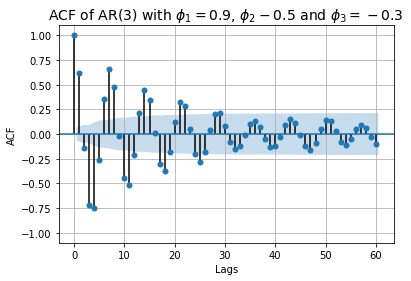

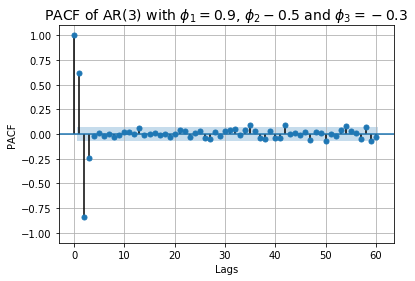

In [66]:
h_max = 60

# ACF
plot_acf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.title('ACF of AR(3) with $\phi_1 = 0.9$, $\phi_2 -0.5$ and $\phi_3 = -0.3$', size = 14)
plt.grid(True)
plt.show()

# PACF
plot_pacf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.title('PACF of AR(3) with $\phi_1 = 0.9$, $\phi_2 -0.5$ and $\phi_3 = -0.3$',size = 14)
plt.grid(True)
plt.show()

From the partical autocorrelations in the PACF plot, it is clearly observable that the time series results from an AR(3) process as the partial autocorrelations are outside the bounds and therefore significant up to lag 3.

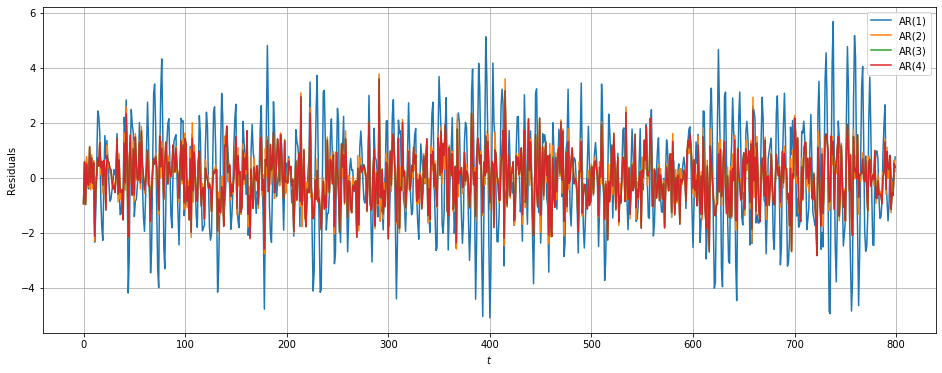

In [67]:
# Model Fit and Residuals Computation
q = 0
df_residuals = pd.DataFrame(columns = ['AR_1', 'AR_2', 'AR_3', 'AR_4'])
for p in range(1,5):
    model = ARIMA(xt, order = (p,0,q))
    model_fit = model.fit()
    xt_fitted = model_fit.predict()
    residuals = xt - xt_fitted
    if p == 1:
        df_residuals['AR_1'] = residuals
    elif p == 2:
        df_residuals['AR_2'] = residuals
    elif p == 3:
        df_residuals['AR_3'] = residuals
    elif p == 4:
        df_residuals['AR_4'] = residuals

# Residual Plot
plt.figure(figsize = (16,6))
plt.plot(df_residuals['AR_1'], label = 'AR(1)')
plt.plot(df_residuals['AR_2'], label = 'AR(2)')
plt.plot(df_residuals['AR_3'], label = 'AR(3)')
plt.plot(df_residuals['AR_4'], label = 'AR(4)')
plt.xlabel('$t$')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

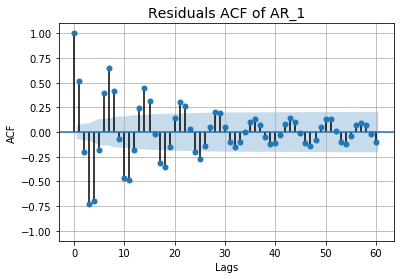

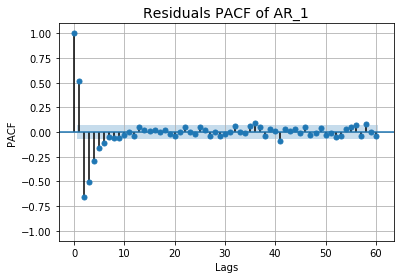

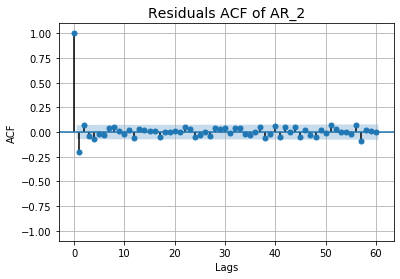

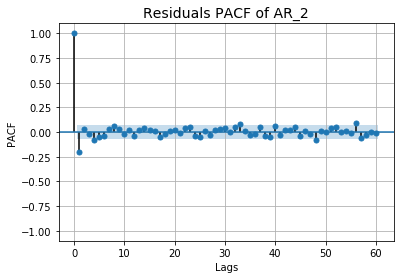

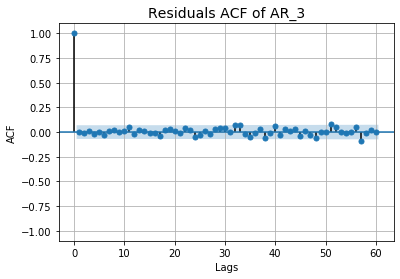

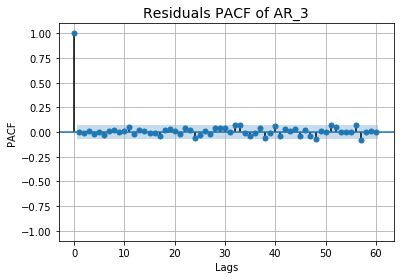

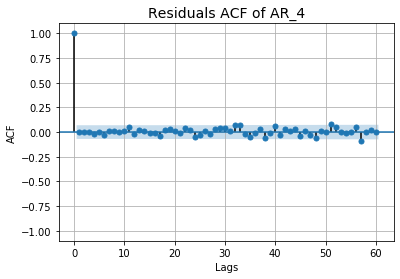

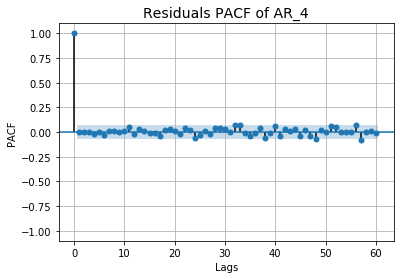

In [68]:
h_max = 60
models = ['AR_1', 'AR_2', 'AR_3', 'AR_4']

for model in models:
    # ACF
    plot_acf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.title('Residuals ACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()
    # PACF
    plot_pacf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.title('Residuals PACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()

Based on the ACF and PACF plots of the model residuals, the correct model and order specification (in that case AR(3)) shows autocorrelations and partial autocorrelations which are inside the bounds and therefore insignificant from lag 1 on. As of the plots, lower order models show PACFs for lag 1 and/or higher which are significant, which leads to the conclusion that the model and the model's orders are not correctly specified. It can be said that if the PACFs of the model residuals are still significant for any lag other than 0 (which is always 1) for an AR(p) model, a higher order model should be chosen in order to find a well-fitting model.

## Problem 2 (3 points)
This problem is very similar to Problem 1 - please perform in steps:  

(a) Set seed as np.random.seed(1678) and then generate $n=800$ observations $x_1,x_2,\ldots,x_n$ of an MA(3) with $\sigma_w=1$, $\theta_1 = 0.3$, $\theta_2=0.1$, and $\theta_3=-0.3.$ Plot the sample ACF and PACF of $x_t$. Notice how easy it is to infer from the ACF and PACF plots what process $x_t$ follows.  
(b) Fit MA(1), MA(2), MA(3), and MA(4) to the time series. Plot sample ACF and PACF of the model residuals in each case. Make sure to properly label the cases.   
(c) Finally, observe how residuals behave in each case and comment on how on can/should use ACF and PACF of residuals in order to improve the model. Specifically, please comment on what ACF of PACF of residuals in case of the "right" model.

SOLUTION:

In [69]:
# generate n observations of MA(3)
phi =   np.array([0])
theta = np.array([0.3,0.1,-0.3])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:", arma_process.isstationary)
print("Is the process invertible?  Answer:", arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n=800
xt = smt.arma_generate_sample(ar = ar, ma = ma, scale = sigma, nsample = n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




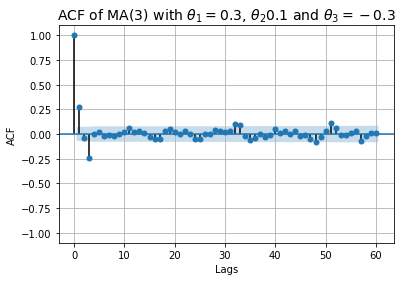

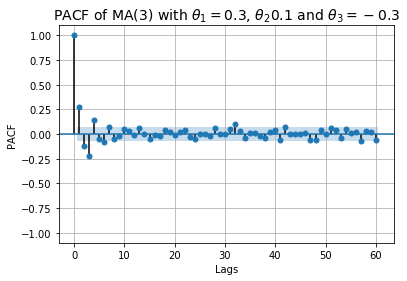

In [70]:
h_max = 60

# ACF
plot_acf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.title('ACF of MA(3) with $\\theta_1 = 0.3$, $\\theta_2 0.1$ and $\\theta_3 = -0.3$', size = 14)
plt.grid(True)
plt.show()

# PACF
plot_pacf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.title('PACF of MA(3) with $\\theta_1 = 0.3$, $\\theta_2 0.1$ and $\\theta_3 = -0.3$',size = 14)
plt.grid(True)
plt.show()

From the autocorrelations in the ACF plot, it is clearly observable that the time series results from a MA(3) process as the autocorrelations are outside the bounds and therefore significant up to lag 3.

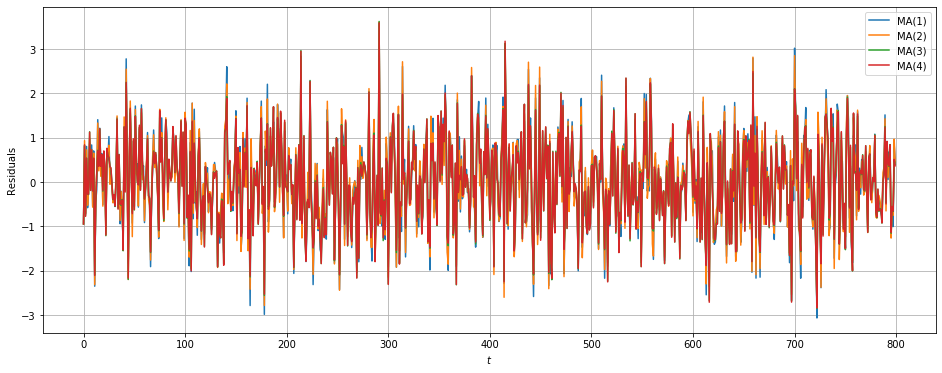

In [71]:
# Model Fit and Residuals Computation
p = 0
df_residuals = pd.DataFrame(columns = ['MA_1', 'MA_2', 'MA_3', 'MA_4'])
for q in range(1,5):
    model = ARIMA(xt, order = (p,0,q))
    model_fit = model.fit()
    xt_fitted = model_fit.predict()
    residuals = xt - xt_fitted
    if q == 1:
        df_residuals['MA_1'] = residuals
    elif q == 2:
        df_residuals['MA_2'] = residuals
    elif q == 3:
        df_residuals['MA_3'] = residuals
    elif q == 4:
        df_residuals['MA_4'] = residuals

# Residual Plot
plt.figure(figsize = (16,6))
plt.plot(df_residuals['MA_1'], label = 'MA(1)')
plt.plot(df_residuals['MA_2'], label = 'MA(2)')
plt.plot(df_residuals['MA_3'], label = 'MA(3)')
plt.plot(df_residuals['MA_4'], label = 'MA(4)')
plt.xlabel('$t$')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

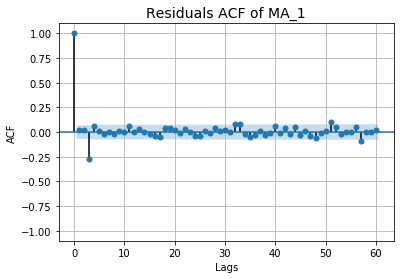

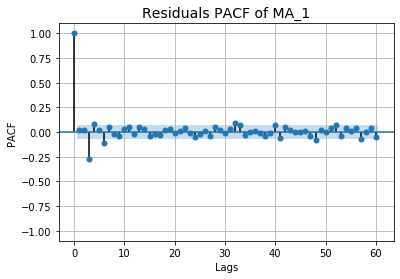

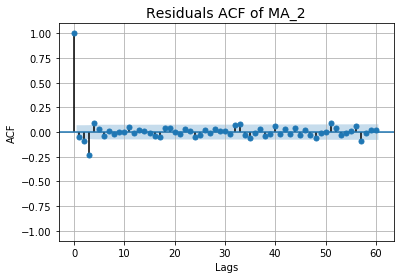

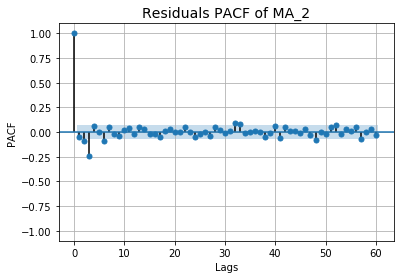

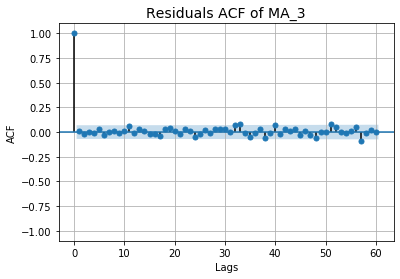

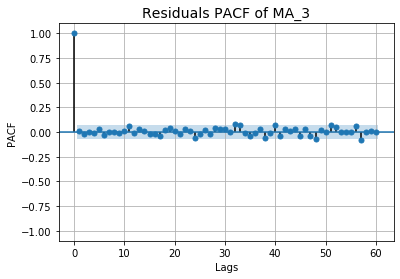

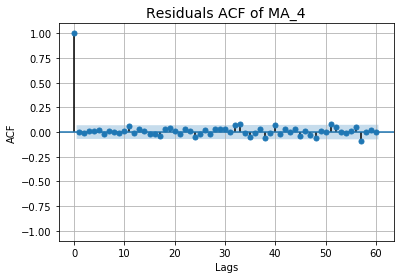

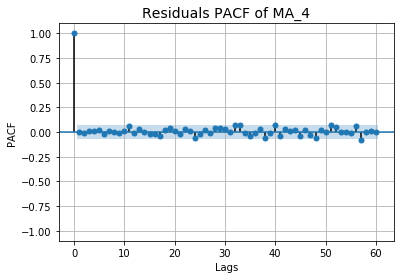

In [72]:
h_max = 60
models = ['MA_1', 'MA_2', 'MA_3', 'MA_4']

for model in models:
    # ACF
    plot_acf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.title('Residuals ACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()
    # PACF
    plot_pacf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.title('Residuals PACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()

Based on the ACF and PACF plots of the model residuals, the correct model and order specification (in that case MA(3)) shows autocorrelations and partial autocorrelations which are inside the bounds and therefore insignificant from lag 1 on. As of the plots, lower order models show ACFs and PACFs for lag 1 and/or higher which are significant, which leads to the conclusion that the model and the model's orders are not correctly specified. It can be said that if the ACFs of the model residuals are still significant for any lag other than 0 (which is always 1) of a MA(q) model, a higher order model should be chosen in order to find a well-fitting model.

## Problem 3 (4 points)
In this problem we will use residuals to see how one can pick the best model in case of ARMA(p,q) process with both $p,q>0$. Please perform in steps:  

(a) Set seed as np.random.seed(1678) and then generate $n=800$ observations $x_1,x_2,\ldots,x_n$ of an ARMA(2,2) with $\sigma_w=1$, $\phi_1=1.4$, $\phi_2=-0.5$ and $\theta_1 = -1.2$, $\theta_2=0.8.$ Plot the sample ACF and PACF of $x_t$. Notice that it is not so easy to pick $p$ and $q$ as in cases of AR and MA processes. In fact, this is true even if we know exact ACF and PACF (you can try it).   
(b) Fit ARMA(1,0), ARMA(0,1), ARMA(1,1), ARMA(1,2), ARMA(2,1), ARMA(2,2), ARMA(2,3), ARMA(3,2), and ARMA(3,3) to the time series. Plot sample ACF and PACF of the model residuals in each case. Make sure to properly label the cases.   
(c) Finally, observe how residuals behave in each case and comment on how on can/should use ACF and PACF of residuals in order to pick p and q. Specifically, please comment on what ACF of PACF of residuals in case of the "right" model - the residuals in this case should resemble a white noise process. This procedure of analyzing residuals is known as part of the diagnostic step of the "The Box-Jenkins Methodology."


SOLUTION:

In [73]:
# generate n observations of AR(3)
phi =   np.array([1.4, -0.5])
theta = np.array([-1.2,0.8])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:", arma_process.isstationary)
print("Is the process invertible?  Answer:", arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n=800
xt = smt.arma_generate_sample(ar = ar, ma = ma, scale = sigma, nsample = n)

Is the process causal?      Answer: True
Is the process invertible?  Answer: True




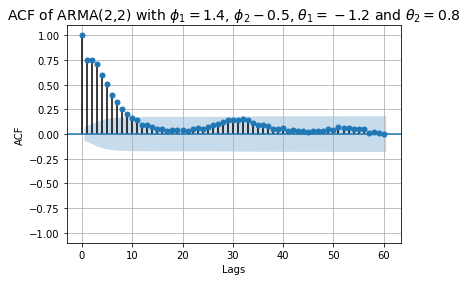

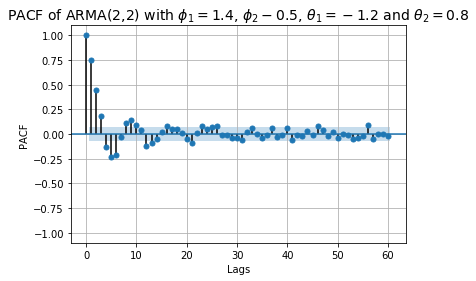

In [74]:
h_max = 60

# ACF
plot_acf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.title('ACF of ARMA(2,2) with $\phi_1 = 1.4$, $\phi_2 -0.5$, $\\theta_1 = -1.2$ and $\\theta_2 = 0.8$', size = 14)
plt.grid(True)
plt.show()

# PACF
plot_pacf(xt, lags = h_max)
plt.ylim(-1.1, 1.1)
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.title('PACF of ARMA(2,2) with $\phi_1 = 1.4$, $\phi_2 -0.5$, $\\theta_1 = -1.2$ and $\\theta_2 = 0.8$',size = 14)
plt.grid(True)
plt.show()

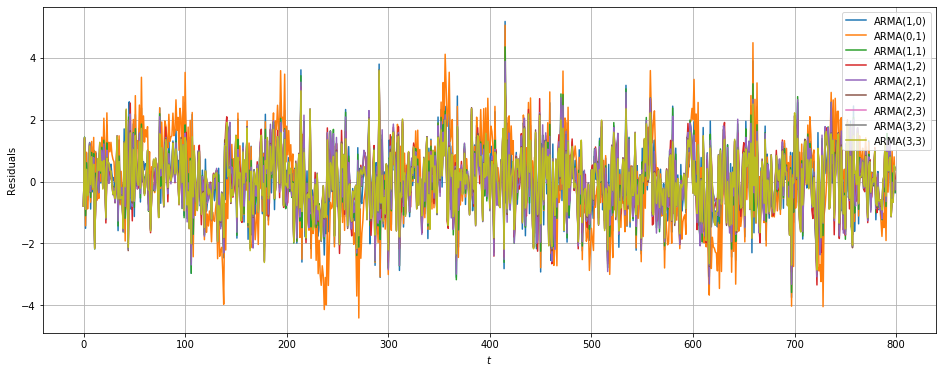

In [75]:
# Model Fit and Residuals Computation
df_residuals = pd.DataFrame(columns = ['ARMA_1_0', 'ARMA_0_1', 'ARMA_1_1', 'ARMA_1_2', 'ARMA_2_1', 'ARMA_2_2', 'ARMA_2_3', 'ARMA_3_2', 'ARMA_3_3'])
for q in range(0,4):
    for p in range(0,4):
        model = ARIMA(xt, order = (p,0,q))
        model_fit = model.fit()
        xt_fitted = model_fit.predict()
        residuals = xt - xt_fitted
        if p == 1 and q == 0:
            df_residuals['ARMA_1_0'] = residuals
        elif p == 0 and q == 1:
            df_residuals['ARMA_0_1'] = residuals
        elif p == 1 and q == 1:
            df_residuals['ARMA_1_1'] = residuals
        elif p == 1 and q == 2:
            df_residuals['ARMA_1_2'] = residuals
        elif p == 2 and q == 1:
            df_residuals['ARMA_2_1'] = residuals
        elif p == 2 and q == 2:
            df_residuals['ARMA_2_2'] = residuals
        elif p == 2 and q == 3:
            df_residuals['ARMA_2_3'] = residuals
        elif p == 3 and q == 2:
            df_residuals['ARMA_3_2'] = residuals
        elif p == 3 and q == 3:
            df_residuals['ARMA_3_3'] = residuals

# Residual Plot
plt.figure(figsize = (16,6))
plt.plot(df_residuals['ARMA_1_0'], label = 'ARMA(1,0)')
plt.plot(df_residuals['ARMA_0_1'], label = 'ARMA(0,1)')
plt.plot(df_residuals['ARMA_1_1'], label = 'ARMA(1,1)')
plt.plot(df_residuals['ARMA_1_2'], label = 'ARMA(1,2)')
plt.plot(df_residuals['ARMA_2_1'], label = 'ARMA(2,1)')
plt.plot(df_residuals['ARMA_2_2'], label = 'ARMA(2,2)')
plt.plot(df_residuals['ARMA_2_3'], label = 'ARMA(2,3)')
plt.plot(df_residuals['ARMA_3_2'], label = 'ARMA(3,2)')
plt.plot(df_residuals['ARMA_3_3'], label = 'ARMA(3,3)')
plt.xlabel('$t$')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

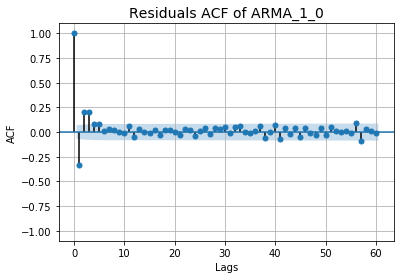

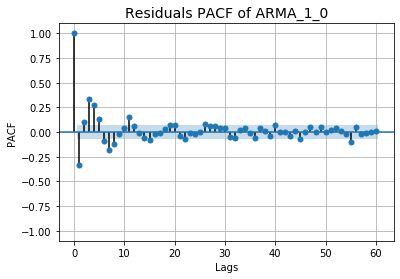

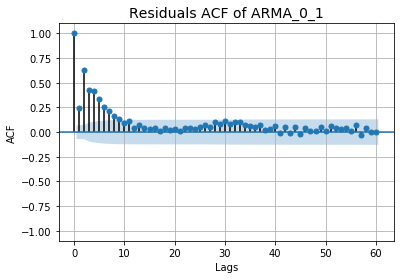

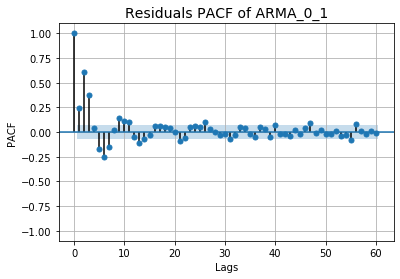

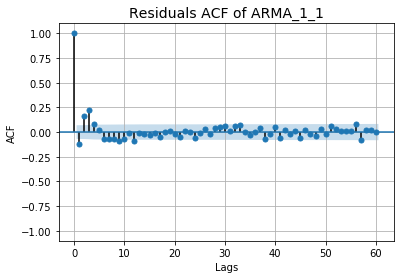

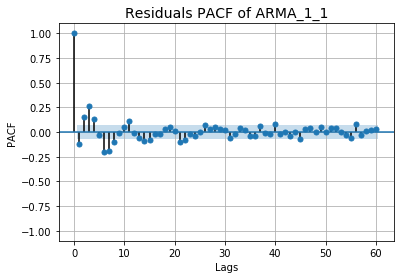

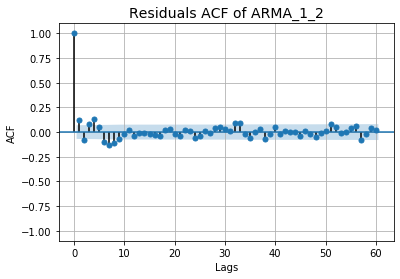

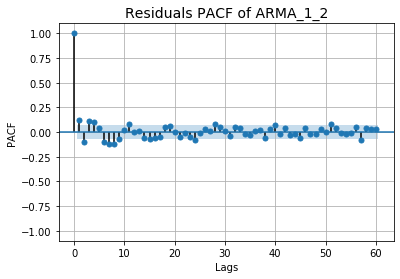

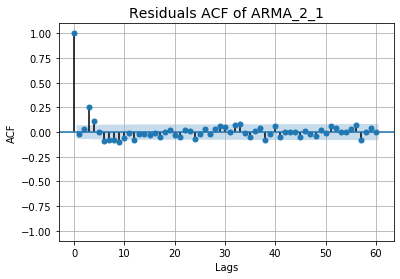

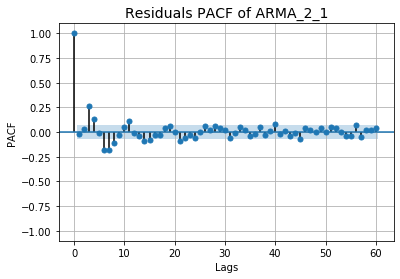

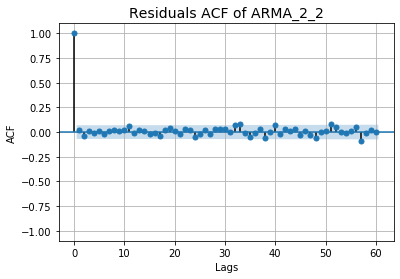

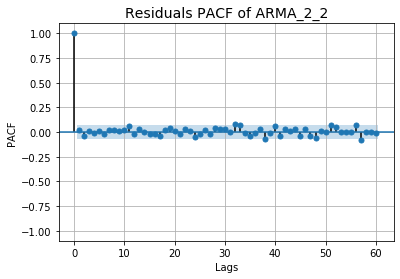

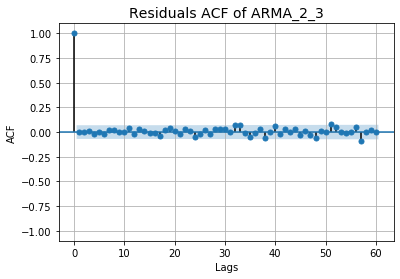

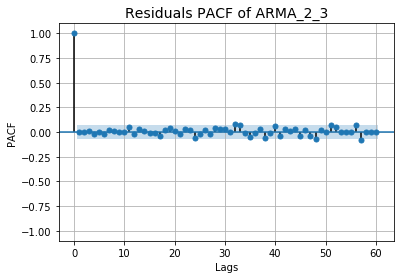

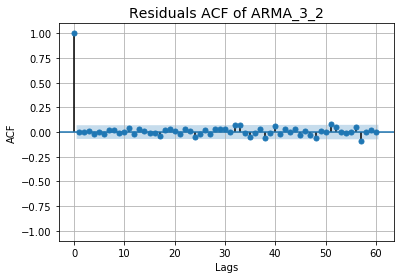

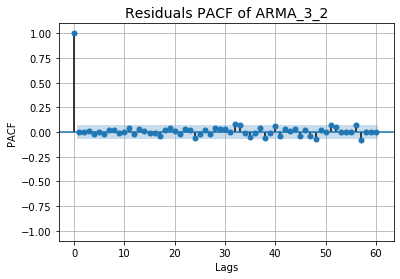

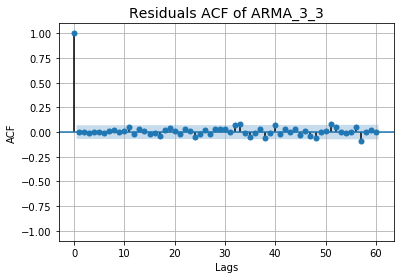

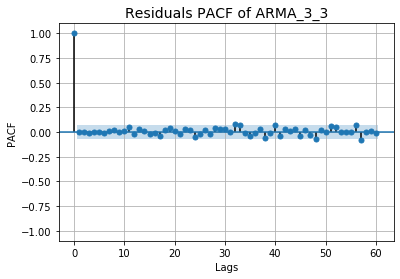

In [76]:
h_max = 60
models = ['ARMA_1_0', 'ARMA_0_1', 'ARMA_1_1', 'ARMA_1_2', 'ARMA_2_1', 'ARMA_2_2', 'ARMA_2_3', 'ARMA_3_2', 'ARMA_3_3']

for model in models:
    # ACF
    plot_acf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.title('Residuals ACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()
    # PACF
    plot_pacf(df_residuals[model], lags = h_max)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.title('Residuals PACF of ' + model, size = 14)
    plt.grid(True)
    plt.show()

Based on the ACF and PACF plots of the model residuals, the correct model and order specification (in that case ARMA(2,2)) shows autocorrelations and partial autocorrelations which are inside the bounds and therefore insignificant from lag 1 on, as also defined by the ACFs and PACFs of a white noise process. As of the plots, lower order models show ACFs and PACFs for lag 1 and/or higher which are significant, which leads to the conclusion that the model and the model's orders are not correctly specified. It can be said that if the ACFs and PACFs of the model residuals are still significant for any lag other than 0 (which is always 1) of an ARMA(p,q) model, a higher order model should be chosen in order to find a well-fitting model. To finaally conclude, the order specification of p and q for an ARMA(p,q) model is difficult by using the original time series ACF and PACF, but the PACF and ACF of the residuals confirm wether the choice of the AR- and MA-orders lead to white noise residuals.